### **Program** : Playground 2

### **Purpose** : T.S.E.s and Euler's method.

### **Author** : Josh B.    **Date** : 10.07.2024


*Begin Program*                       

Imported Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1] Explaining T.S.E. to Knight Solaire :

Dear Sir Solaire,

Imagine you are looking for a place to praise the sun and since you like the sun so much you want to pick the time that has the best sunlight. Since you praise the sun often you probably know the best time to praise it is around noon. But, when is noon? Noon is when the sun is at its highest point but when exactly is that? Well, if we can estimate how fast the sun moves in the sky, and how fast that speed changes, we can guess when noon is! Consider sunrise as a starting point and use your estimates for the speed and acceleration of the sun to try and guess how long it will be until the sun has reached half the amount of time that it has been in the sky.

Praise the sun,

Josh B.

2] Euler's method :

ODEs of the form $\frac{dx(t)}{dt}=f(x,t)$ can be solved by considering the TSE of the function a small distance from some point and then discretizing the relation.

$x(t+h)\approx x(t)+h\frac{dx}{dt}+\frac{h^2}{2}\frac{d^2x}{dt^2}+\mathcal{O}(h^3)$
 
$=x(t)+hf(x,t)+\mathcal{O}(h^2)$

Which, for values of $h$ that are small enough then $h^2$ may be ignored.

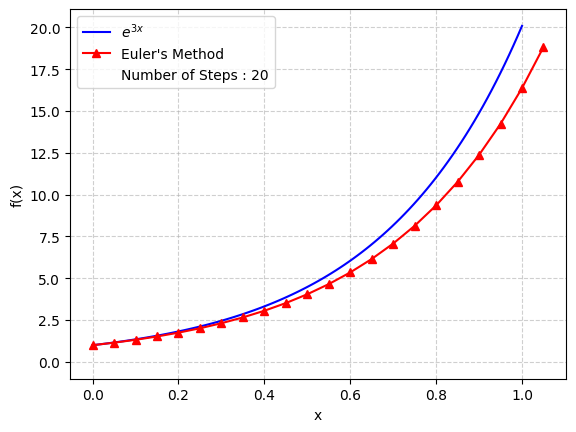

In [2]:
#==================
' 2]a)            '
'                 '
' f\'(x) = 3 f(x) ' 
' f(0) = 1        '
#==================

#_____________________
# the number of steps

n = int ( 2e1 )

#___________
# step size

h = 1/n

#_______
# I.V.s

x0 = 0
f0 = 1

#______________
# value arrays

xl = [ x0 ]
fl = [ f0 ]

#_______________
# main loop for
# computation

for i in range ( n + 1 ) :

    #________________
    # current values

    xn = xl [ i ]
    fn = fl [ i ]

    #_________________
    # projected values

    xn1 = xn + h
    fn1 = fn + 3 * h * fn

    #___________________
    # adding new values
    # to array

    xl.append ( xn1 )
    fl.append ( fn1 )

#_________________________
# visualization macguffin

x = np.linspace ( 0 , x0 + n * h , 100 )

plt.plot ( x , np.exp ( 3 * np.array ( x ) ) , label = r'$e^{3x}$' , color = 'b' )
plt.plot ( xl , fl , label = 'Euler\'s Method' , marker = '^' , color = 'r' )
plt.plot ( x , x , ls = ' ' , label = 'Number of Steps : ' + str ( n ) )

plt.xlabel ( 'x' )
plt.ylabel ( 'f(x)' )

plt.grid ( ls = '--' , alpha = 0.6 )
plt.legend() ;

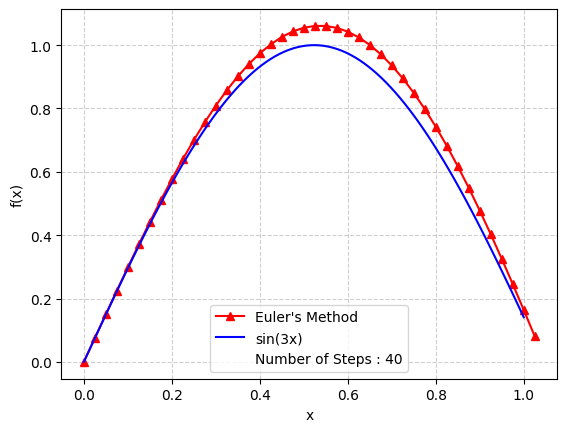

In [3]:
#=========================
' 2]b)                   '
'                        '
' f''(x) = - 9 f(x)      '
'f(0) = 0 , f\'(0) = 3   '
#=========================

#_____________________
# the number of steps

n = int ( 4e1 )

#___________
# step size

h = 1 / n

#_______
# I.V.s

x0 = 0
f0 = 0
fp0 = 3

#______________
# value arrays

xl = [ x0 ]
fl = [ f0 ]
fpl = [ fp0 ]

#_______________
# main loop for
# computation

for i in range ( n + 1 ) :

    #________________
    # current values

    xn = xl [ i ]
    fn = fl [ i ]
    fpn = fpl [ i ]

    #_________________
    # projected values

    xn1 = xn + h
    fn1 = fn + h * fpn
    fpn1 = fpn - 9 * h * fn

    #___________________
    # adding new values
    # to array

    xl.append( xn1 )
    fl.append ( fn1 )
    fpl.append ( fpn1 )

#_________________________
# visualization macguffin

x = np.linspace ( 0 , 0 + n * h , 100 )

plt.plot ( xl , fl , label = 'Euler\'s Method' , marker = '^' , color = 'r' )
plt.plot ( x , np.sin ( 3 * x ) , label = 'sin(3x)' , color = 'b' )
plt.plot ( x , x , ls =' ' , label = 'Number of Steps : ' + str ( n ) )

plt.xlabel ( 'x' )
plt.ylabel ( 'f(x)' )

plt.grid ( ls = '--' , alpha = 0.6 )
plt.legend() ;

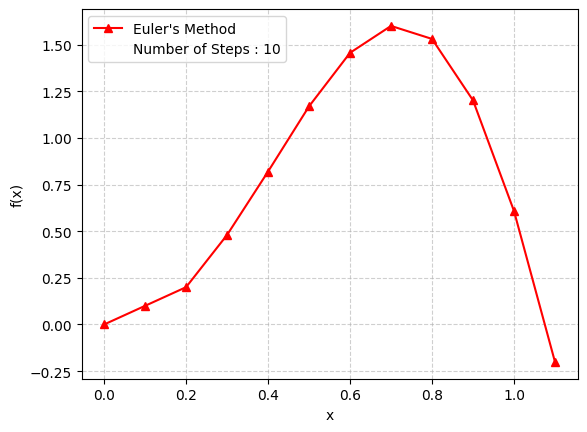

In [4]:
#====================================================
' 2]c)                                              '
' f''(x) = (2/(x^2)-30/(1+exp[-(x-3)/0.5])-20)*f(x) '
' f(0) = 0 , f\'(0) = 1                             '
#====================================================

#_____________________
# the number of steps

n = int ( 1e1 )

#___________
# step size

h = 1 / n

#_______
# I.V.s

x0 = 1e-15
f0 = 0
fp0 = 1

#______________
# value arrays

xl = [ x0 ]
fl = [ f0 ]
fpl = [ fp0 ]

#_______________
# main loop for
# computation

for i in range ( n + 1 ) :

    #________________
    # current values

    xn = xl [ i ]
    fn = fl [ i ]
    fpn = fpl [ i ]

    #_________________
    # projected values

    xn1 = xn + h
    fn1 = fn + h * fpn
    fpn1 = fpn + ( 2 / ( xn ** 2 ) - 30 / ( 1 + np.exp ( - ( xn - 3 ) / 0.5 ) ) - 20 ) * h * fn

    #___________________
    # adding new values
    # to array

    xl.append ( xn1 )
    fl.append ( fn1 )
    fpl.append ( fpn1 )

#_________________________
# visualization macguffin

plt.plot ( xl , fl , label = 'Euler\'s Method' , marker = '^' , color = 'r' )
plt.plot ( x , x , ls = ' ' , label = 'Number of Steps : ' + str ( n ) )

plt.xlabel ( 'x' )
plt.ylabel ( 'f(x)' )

plt.grid ( ls = '--' , alpha = 0.6 )
plt.legend() ;

3] **The Pendulum and the (*not pit*) small angle approximation** <br>

The O.D.E.: <br>

$\frac{d^2\theta}{dt^2}+\frac{g}{l}\sin{\theta}=0$ <br>

For small angles, $\theta\approx 0$, then we may approximate $\sin{\theta}$, <br>

$\sin{\theta}\approx\theta-\frac{1}{3!}\theta^3+\frac{1}{5!}\theta^5=\theta+\mathcal{O}(\theta^2)$ <br>

Now, because $\theta$ is small we may further approximate this function by observing that terms of order 2 and higher will be much smaller than the first order term and can be neglected from the approximation. Therefore, <br>

$\sin{\theta}\approx\theta \quad \backepsilon \quad \theta << 1$ <br>

Finally, our original O.D.E. takes the form, <br>

$\frac{d^2\theta}{dt^2}+\frac{g}{l}\theta=0 \implies \frac{d^2\theta}{dt^2}=-\frac{g}{l}\theta$ <br>

Now, for constants and I.V.s I'll give : <br>

l = 0.25 [ m ] <br>
g = 9.81 [ kg/$m^2$ ] <br>

$\theta(t=0)=0$ <br>
$\dot{\theta}(t=0)=0.1$ [ m/s] <br>

Omitting the usual steps of providing an ansatz and working it through the machinery of the usual solution method I instead define a constant $\omega^2=g/l$ and note the solution will take the form, <br>

$\theta(t)=0.1*\sqrt{\frac{l}{g}}\sin(\sqrt{\frac{g}{l}}t)$

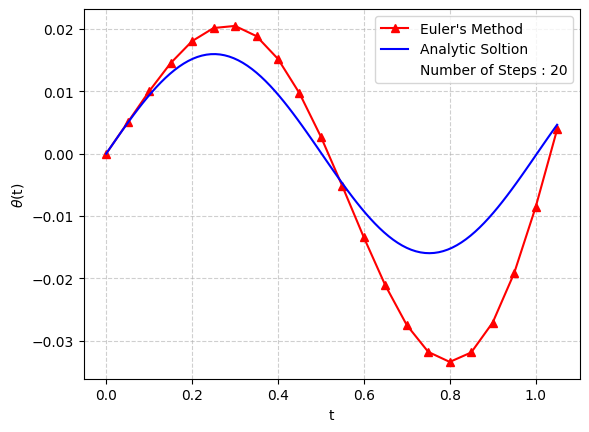

In [5]:
#==================
' 3] The Pendulum '
#==================

#___________
# constants

g = 9.81
l = 0.25
omg = np.sqrt ( g / l )

#_____________________
# the number of steps

n = int ( 2e1 )


#___________
# step size

h = 1 / n

#_______
# I.V.s

x0 = 0
f0 = 0
fp0 = 0.1

#______________
# value arrays

xl = [ x0 ]
fl = [ f0 ]
fpl = [ fp0 ]

#_______________
# main loop for
# computation

for i in range ( n + 1 ) :

    #________________
    # current values

    xn = xl [ i ]
    fn = fl [ i ]
    fpn = fpl [ i ]

    #_________________
    # projected values

    xn1 = xn + h
    fn1 = fn + h * fpn
    fpn1 = fpn - ( g / l ) * h * fn

    #___________________
    # adding new values
    # to array

    xl.append( xn1 )
    fl.append ( fn1 )
    fpl.append ( fpn1 )

#_________________________
# visualization macguffin

x = np.linspace ( 0 , xl [ -1 ] , 100 )
ans = 0.1 * ( 1 / omg ) * np.sin ( omg * x )

plt.plot ( xl , fl , label = 'Euler\'s Method' , marker = '^' , color = 'r' )
plt.plot ( x , ans , label = 'Analytic Soltion' , color = 'b' )
plt.scatter ( [0] , [0] , marker = ' ' , label = 'Number of Steps : ' + str ( n ) )

plt.xlabel ( 't' )
plt.ylabel ( r'$\theta$(t)' )

plt.grid ( ls = '--' , alpha = 0.6 )
plt.legend() ;

Note that the above graph shows us that this solution is pretty unstable. This can be resolved by futzing with the number of steps and the step size. Specifically, remove the dependance that I currently have them set to and increase the number of steps while decreasing the step size.